<a href="https://colab.research.google.com/github/shayanvafaei/Stock-Prediction/blob/main/Stock_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Installing Necessary Packages
!pip install -q yahoo_fin
!pip install -q yfinance

In [106]:
#Import Packages
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yahoo_fin.stock_info as si

from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader.data import DataReader
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
yf.pdr_override()


In [121]:
# Set A
stock_list = ['2222.SR', 'XOM', 'CVX', 'SHEL']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

def get_stock_data(stock, start_date, end_date):
    """
    Retrieves stock data for a list of companies from Yahoo Finance API.
    Returns: stock_data
    """
    stock_data = pd.DataFrame()
    stock_df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
    stock_df['company_name'] = stock
    stock_data = pd.concat([stock_data, stock_df], axis=0)
    return stock_data

#Visualizing Stock Data of The Exxon Mobil Stock
get_stock_data('XOM',start, end)



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-12,83.779999,85.050003,82.860001,84.500000,81.675880,21013000,XOM
2022-07-13,83.379997,86.309998,83.300003,84.839996,82.004517,19928600,XOM
2022-07-14,81.849998,83.309998,80.690002,83.139999,80.361336,26343000,XOM
2022-07-15,84.800003,84.879997,82.900002,84.540001,81.714546,17243700,XOM
2022-07-18,86.580002,87.940002,85.750000,86.099998,83.222404,19395800,XOM
...,...,...,...,...,...,...,...
2023-07-06,105.089996,105.720001,102.430000,102.919998,102.919998,17961400,XOM
2023-07-07,101.919998,104.000000,101.559998,103.160004,103.160004,21926600,XOM
2023-07-10,102.970001,104.750000,102.750000,104.690002,104.690002,14877600,XOM


In [122]:
#Visualizing Fundamental Data of The Exxon Mobil Stock

def fund_data(stock):
  fund_data = si.get_quote_table(stock, dict_result=False)
  return fund_data

fund_data('XOM')

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


,attribute,value
0,1y Target Est,125.3
1,52 Week Range,80.69 - 119.92
2,Ask,106.99 x 1100
3,Avg. Volume,15132619.0
4,Beta (5Y Monthly),1.08
5,Bid,106.98 x 1200
6,Day's Range,106.46 - 107.65
7,EPS (TTM),14.59
8,Earnings Date,"Jul 27, 2023 - Jul 31, 2023"
9,Ex-Dividend Date,"May 15, 2023"


In [137]:
#Visualizing the Adj Close Price of The Stocks
adjclosing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']
stock_returns = adjclosing_df.pct_change()
stock_returns.head()

[*********************100%***********************]  4 of 4 completed


,2222.SR,CVX,SHEL,XOM
Date,,,,
2022-07-12,NaN,NaN,NaN,NaN
2022-07-13,NaN,-0.006694,0.001887,0.004024
2022-07-14,-0.010914,-0.014856,-0.034324,-0.020038
2022-07-15,0.000000,0.012579,0.028825,0.016839
2022-07-17,0.019310,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Correlation of stock closing price')

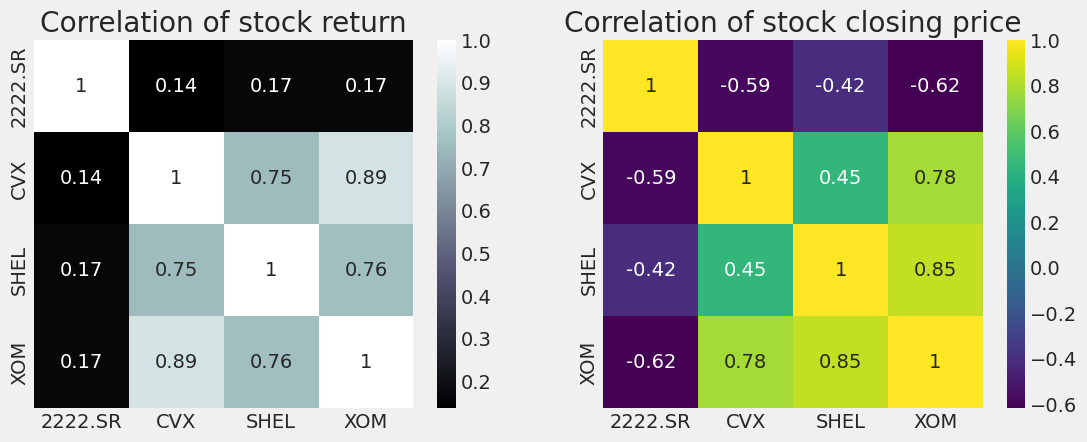

In [162]:
#Visualizing The correlation of stock returns and adk closing price
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_returns.corr(), annot=True, cmap='bone')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(adjclosing_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation of stock closing price')

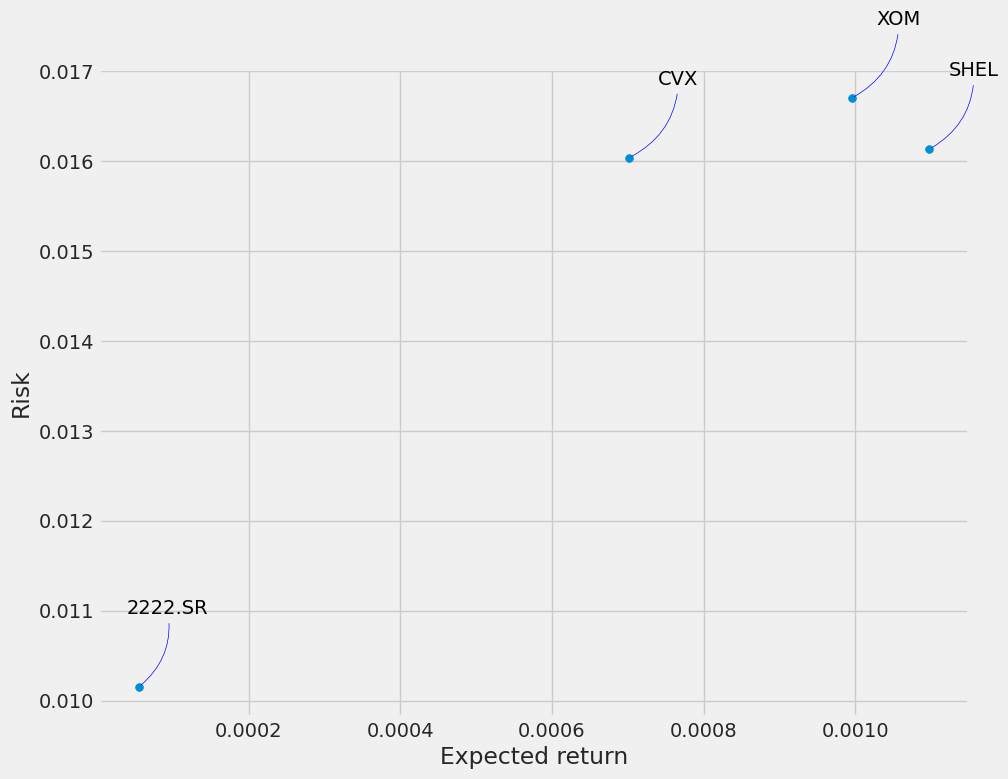

In [139]:
#Visualizing The Stock Expected Return VS Risk

returns = stock_returns.dropna()

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=np.pi * 10)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', color='black', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [143]:
# Get the stock data
df = pdr.get_data_yahoo('XOM', start='2012-01-01', end=datetime.now())
data = df.iloc[:, :6]
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,85.970001,86.669998,85.900002,86.000000,54.028164,20906800
2012-01-04,85.790001,86.150002,85.099998,86.019997,54.040726,16130900
2012-01-05,85.639999,85.949997,84.919998,85.760002,53.877392,17452800
2012-01-06,85.919998,86.000000,85.110001,85.120003,53.475307,15942100
2012-01-09,85.000000,85.639999,84.970001,85.500000,53.714050,11664200
...,...,...,...,...,...,...
2023-07-06,105.089996,105.720001,102.430000,102.919998,102.919998,17961400
2023-07-07,101.919998,104.000000,101.559998,103.160004,103.160004,21926600
2023-07-10,102.970001,104.750000,102.750000,104.690002,104.690002,14877600


In [145]:
# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[8.59700012e+01, 8.66699982e+01, 8.59000015e+01, 8.60000000e+01,
        5.40281639e+01, 2.09068000e+07],
       [8.57900009e+01, 8.61500015e+01, 8.50999985e+01, 8.60199966e+01,
        5.40407257e+01, 1.61309000e+07],
       [8.56399994e+01, 8.59499969e+01, 8.49199982e+01, 8.57600021e+01,
        5.38773918e+01, 1.74528000e+07],
       ...,
       [1.02970001e+02, 1.04750000e+02, 1.02750000e+02, 1.04690002e+02,
        1.04690002e+02, 1.48776000e+07],
       [1.05260002e+02, 1.06160004e+02, 1.04809998e+02, 1.05970001e+02,
        1.05970001e+02, 1.25765000e+07],
       [1.07000000e+02, 1.07650002e+02, 1.06459999e+02, 1.06875000e+02,
        1.06875000e+02, 4.01516400e+06]])

In [148]:
# Get the number of rows to train the model on
train_data_len = int(np.ceil(len(dataset)))
train_data_len

2899

In [149]:
dataset.shape

(2899, 6)

In [65]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[-1.68401951, -1.71479661, -1.67544619, -1.7007389 , -1.7007389 ,
        -0.41701116],
       [-1.70070602, -1.71831857, -1.69070139, -1.71997001, -1.71997001,
        -0.25044926],
       [-1.7234603 , -1.74901013, -1.72985652, -1.72654914, -1.72654914,
        -0.04736863],
       ...,
       [ 0.14188933,  0.15788983,  0.17653939,  0.19352959,  0.19352959,
        -0.34077261],
       [ 0.18537542,  0.15134896,  0.18213301,  0.18593827,  0.18593827,
        -0.37482694],
       [ 0.18537542,  0.16543682,  0.16840327,  0.17228405,  0.17228405,
        -0.62780597]])

In [172]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0:6])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([-1.68401951, -1.70070602, -1.7234603 , -1.72093208, -1.72851683,
       -1.74368645, -1.78110467, -1.74621467, -1.7234603 , -1.71941509,
       -1.73711292, -1.72851683, -1.69362683, -1.68250252, -1.70576256,
       -1.63547689, -1.57783261, -1.56519131, -1.52372788, -1.50147917,
       -1.48580399, -1.47973612, -1.42765404, -1.41096754, -1.43068793,
       -1.44737443, -1.44838576, -1.45799308, -1.44737443, -1.4534422 ,
       -1.46052139, -1.48327567, -1.46102706, -1.48833221, -1.58440604,
       -1.60362086, -1.60817174, -1.6213187 , -1.64457864, -1.61929604,
       -1.61373384, -1.62030737, -1.60614908, -1.62789213, -1.64306165,
       -1.67694032, -1.64255608, -1.66126514, -1.65671427, -1.65873692,
       -1.66581602, -1.62435258, -1.64862385, -1.61322828, -1.59553044,
       -1.60412653, -1.6450843 , -1.61171129, -1.597553  , -1.58996824])]
[array([-1.56013477, -1.55026987, -1.54018311, -1.52664635, -1.52664635,
       -0.02440849])]

[array([-1.68401951, -1.70070602, -1.

In [175]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(6))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=50, epochs=5)

Epoch 1/5
57/57 [==============================] - 36s 497ms/step - loss: 0.2314
Epoch 2/5
57/57 [==============================] - 28s 484ms/step - loss: 0.1735
Epoch 3/5
57/57 [==============================] - 28s 489ms/step - loss: 0.1683
Epoch 4/5
57/57 [==============================] - 28s 487ms/step - loss: 0.1593
Epoch 5/5
57/57 [==============================] - 30s 527ms/step - loss: 0.1625


In [68]:
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions.shape

5/5 [==============================] - 1s 38ms/step


(144, 6)

In [69]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 41ms/step


1679073.4869838352

<ipython-input-70-d00661bd4e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:, i]
<ipython-input-70-d00661bd4e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:, i]
<ipython-input-70-d00661bd4e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

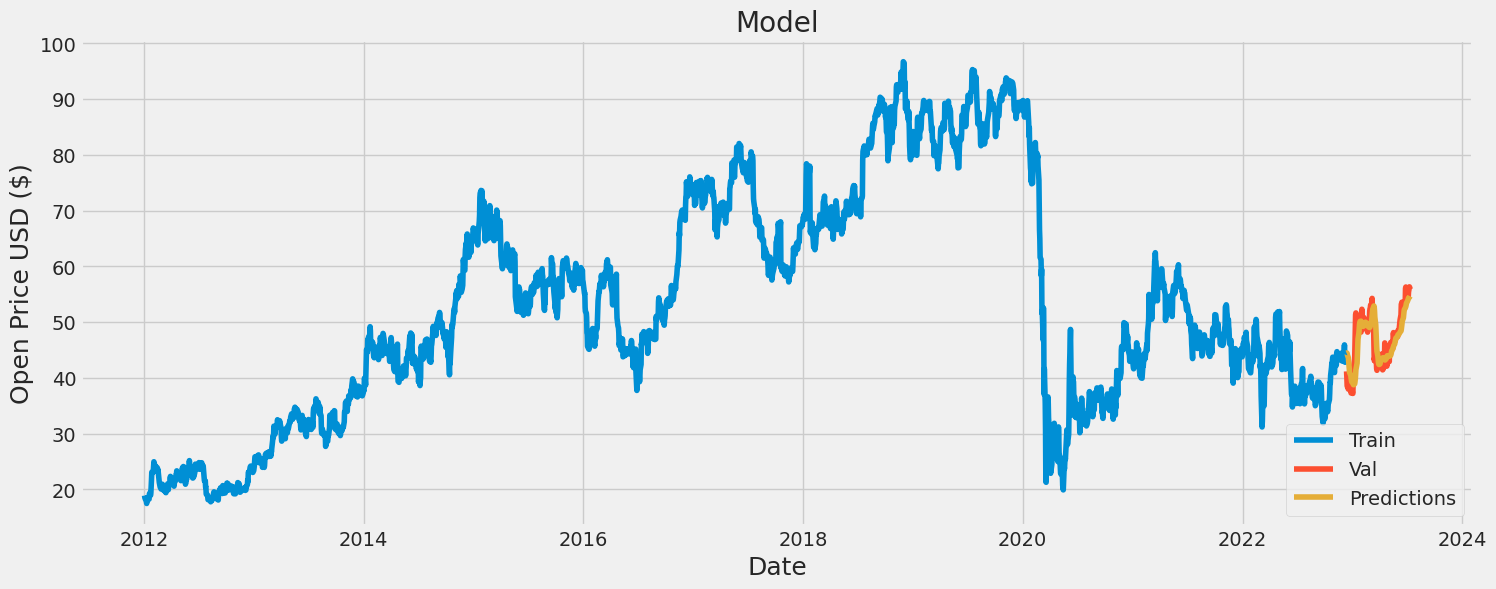

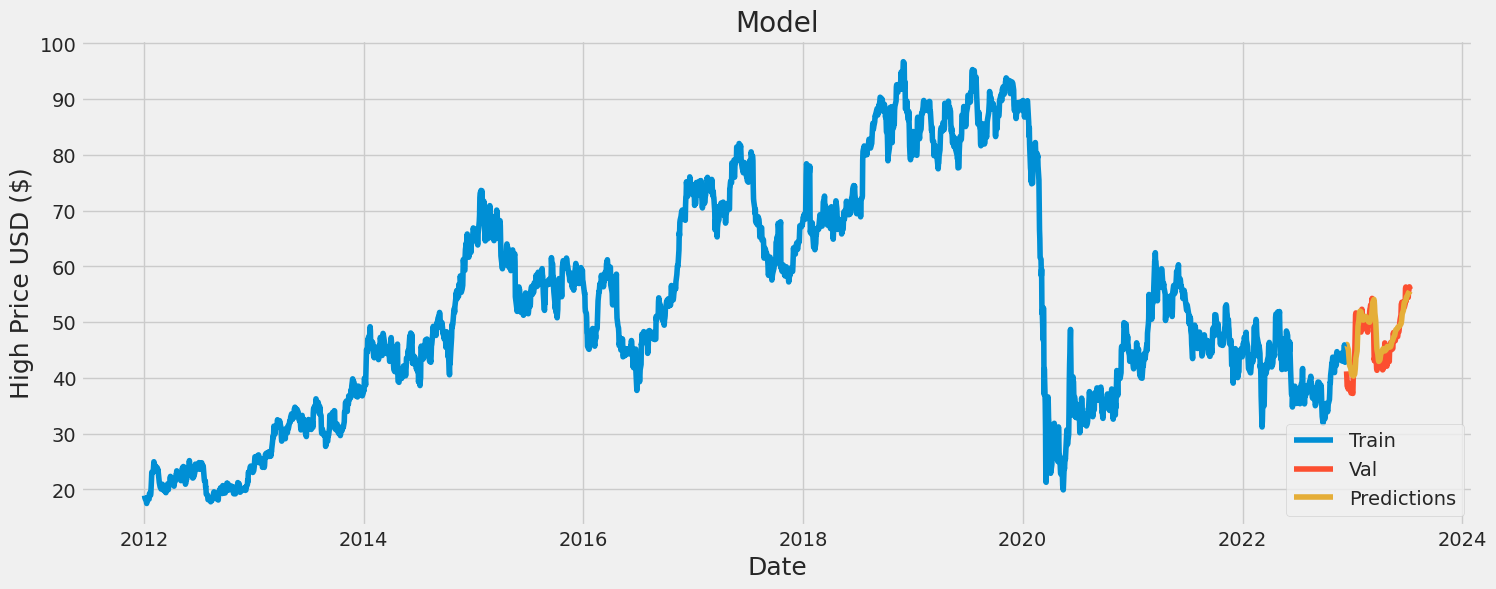

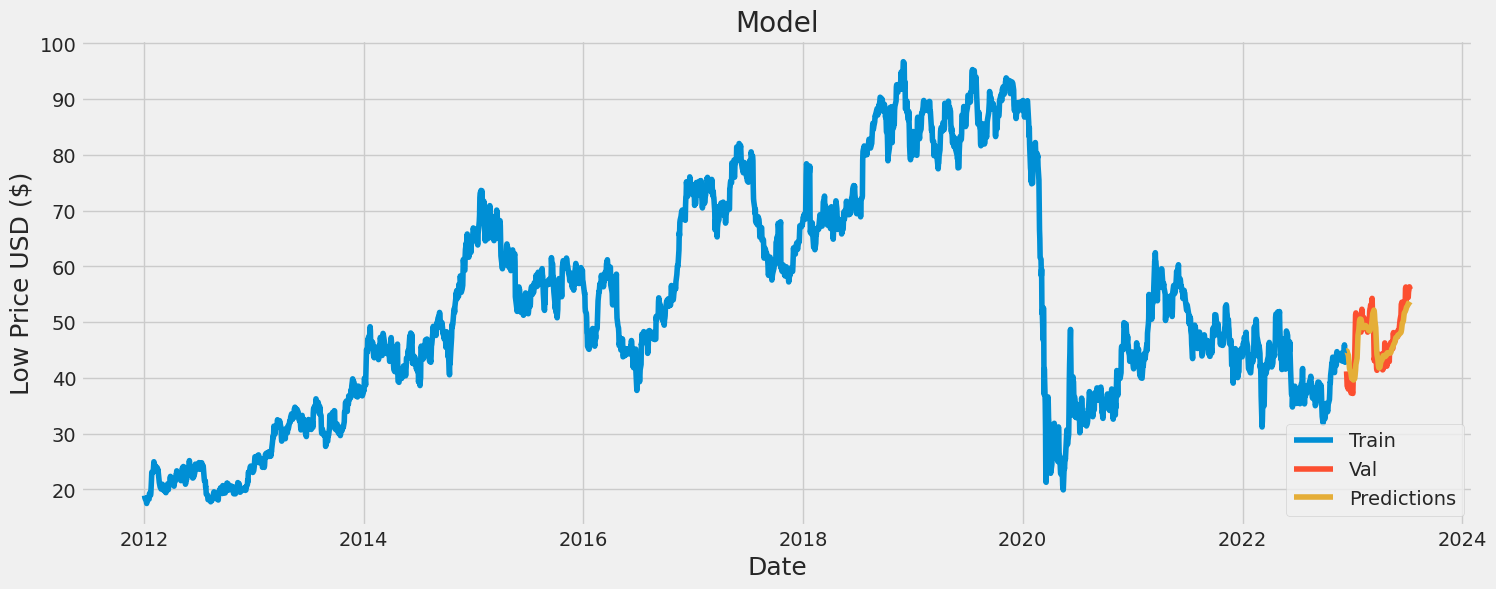

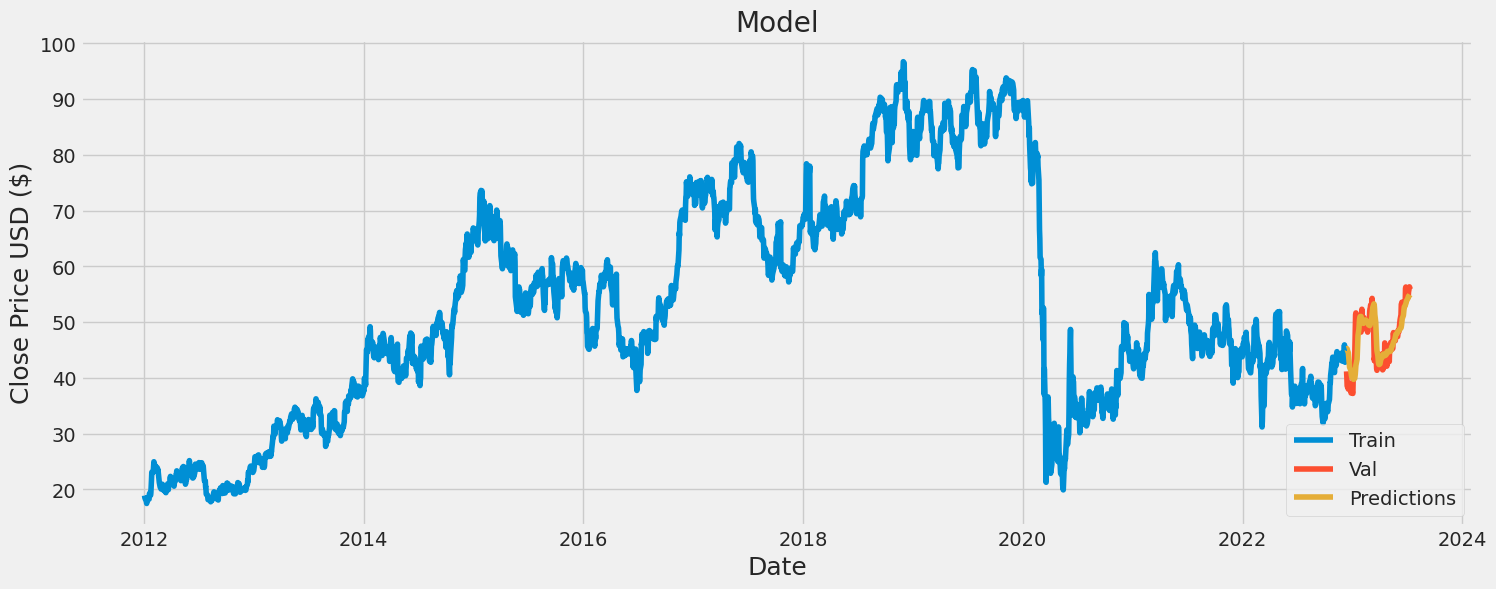

In [70]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
for i in range(4):
  valid['Predictions'] = predictions[:, i]
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(str(df.columns[i]) + ' Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [71]:
valid


,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-12-13,45.500000,45.570000,40.919998,41.169998,41.169998,18385100,45.242756
2022-12-14,41.669998,41.990002,39.639999,40.099998,40.099998,13887300,45.258774
2022-12-15,39.650002,40.070000,38.150002,38.549999,38.549999,10398300,45.178383
2022-12-16,38.520000,39.119999,37.840000,38.430000,38.430000,11429900,44.927814
2022-12-19,38.669998,38.860001,37.889999,37.980000,37.980000,5432500,44.490242
...,...,...,...,...,...,...,...
2023-07-06,54.869999,55.310001,54.150002,54.419998,54.419998,4935000,54.502106
2023-07-07,54.549999,55.740002,54.480000,55.389999,55.389999,5323500,54.651943
2023-07-10,55.340000,56.490002,55.160000,56.330002,56.330002,4779300,54.740170
